## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do grupowania danych. Rozważane są dwa przykłady: dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich oraz dane IRIS.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

import scores

In [2]:
import itertools

def plotClustering(X, plt_labels, *, ax=None, score=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if score:
        ss = scores.get_all(X, labels)
        for name, score in ss.items():
            print(name, score)
    
    plt_colors = itertools.cycle(f'C{i}' for i in range(10))

    plt_K = np.unique(plt_labels).size
    
    # plot samples not in any group
    mask = (plt_labels == -1)
    ax.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor='#cccccc', marker='o')

    for k in range(plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)
        ax.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')

## 1. Pierwszy zestaw danych
Dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich

Silhouette Coefficient 0.669415868232
Dunn Index 0.800561296091
Davies-Bouldin Index 0.50736988968


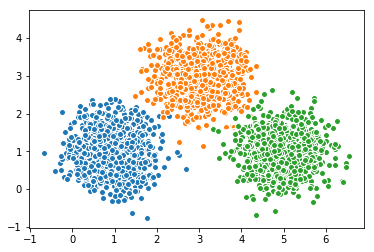

In [25]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

plotClustering(X, labels)

### Grupowanie za pomocą KMeans

Silhouette Coefficient 0.680772859222
Dunn Index 0.7438929446
Davies-Bouldin Index 0.490507992415


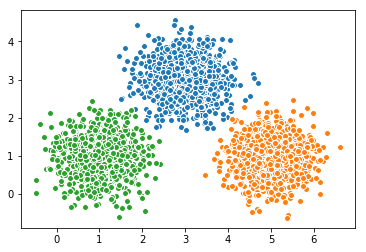

In [4]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

plotClustering(X, k_means.labels_)

### Grupowanie za pomocą MiniBatchKMeans

Silhouette Coefficient 0.680772859222
Dunn Index 0.7438929446
Davies-Bouldin Index 0.490507992415


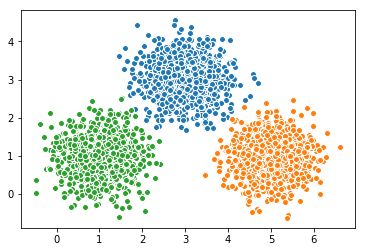

In [5]:
mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=1, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(X)

plotClustering(X, mini_batch_k_means.labels_)

### Grupowanie za pomocą Birch bez wtórnego grupowania

Silhouette Coefficient 0.680772859222
Dunn Index 0.7438929446
Davies-Bouldin Index 0.490507992415


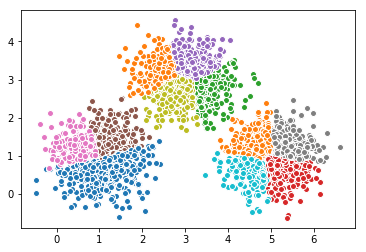

In [6]:
birch = Birch(threshold=0.55, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)

### Grupowanie za pomocą Birch z wtórnym grupowaniem

Silhouette Coefficient 0.680772859222
Dunn Index 0.7438929446
Davies-Bouldin Index 0.490507992415


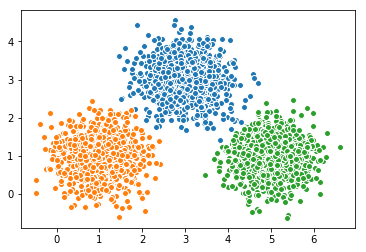

In [7]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plotClustering(X, birch.labels_)

### Grupowanie za pomocą DBScan

Silhouette Coefficient 0.669415868232
Dunn Index 0.800561296091
Davies-Bouldin Index 0.50736988968


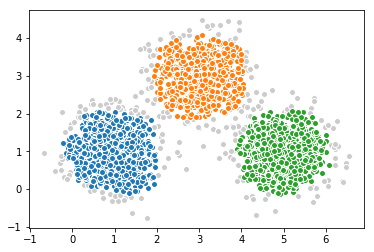

In [26]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

plotClustering(X, dbscan.labels_)

## 2. Drugi zestaw danych
Dane IRIS

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

In [10]:
def plot_iris_clustering(X, labels):
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    ss = scores.get_all(X, labels)
    for name, score in ss.items():
        print(name, score)
    for i in range(4):
        for j in range(4):
            ax = axes[i, j]
            if i == 3:
                ax.set_xlabel(iris.feature_names[j])
            if j == 0:
                ax.set_ylabel(iris.feature_names[i])
            plotClustering(X[:, [i, j]], labels, ax=ax, score=False)
    fig.tight_layout()

Silhouette Coefficient 0.552591944521
Dunn Index 0.671169841783
Davies-Bouldin Index 0.725870479623


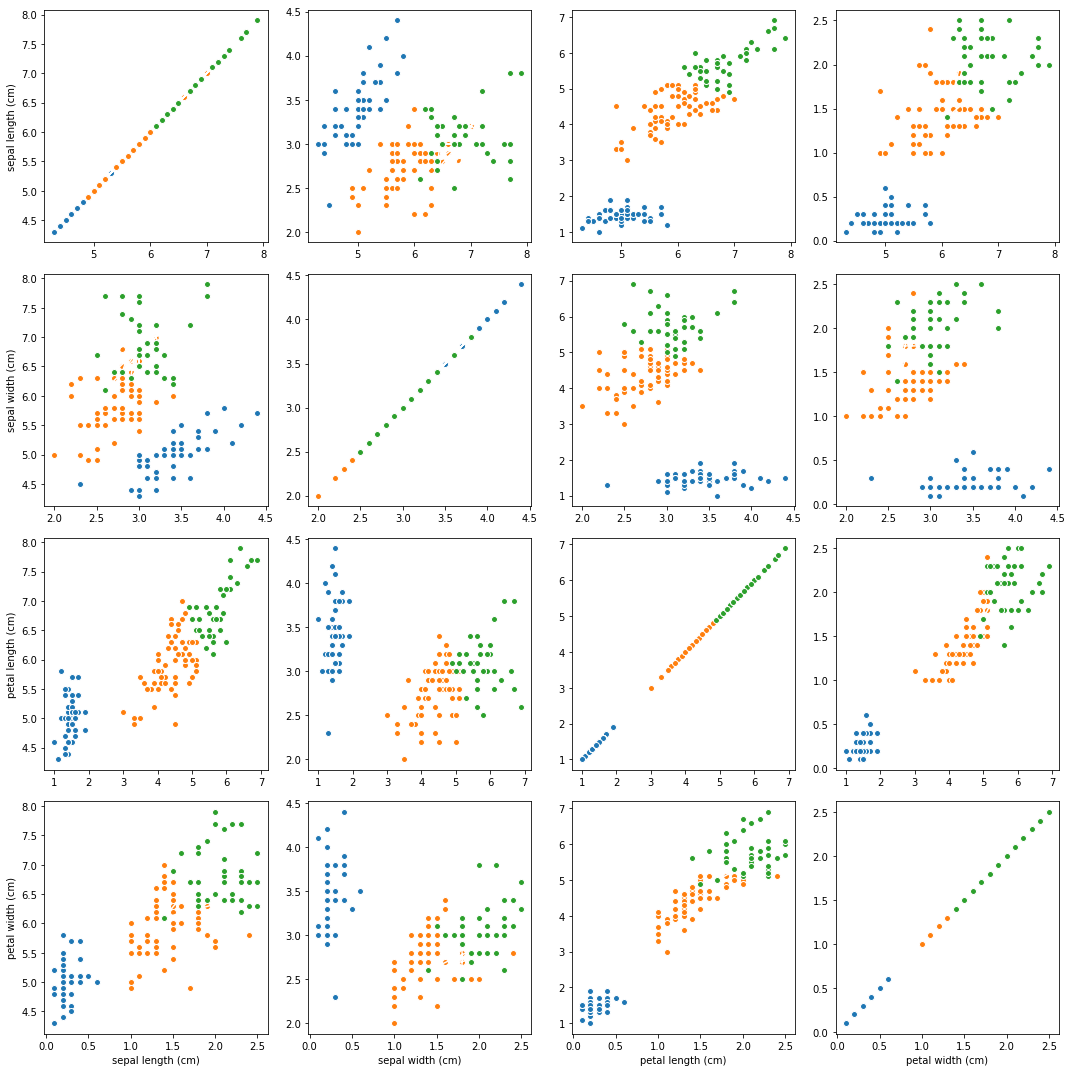

In [11]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

plot_iris_clustering(X, k_means.labels_)

Silhouette Coefficient 0.535269177603
Dunn Index 0.615388185483
Davies-Bouldin Index 0.702148679336


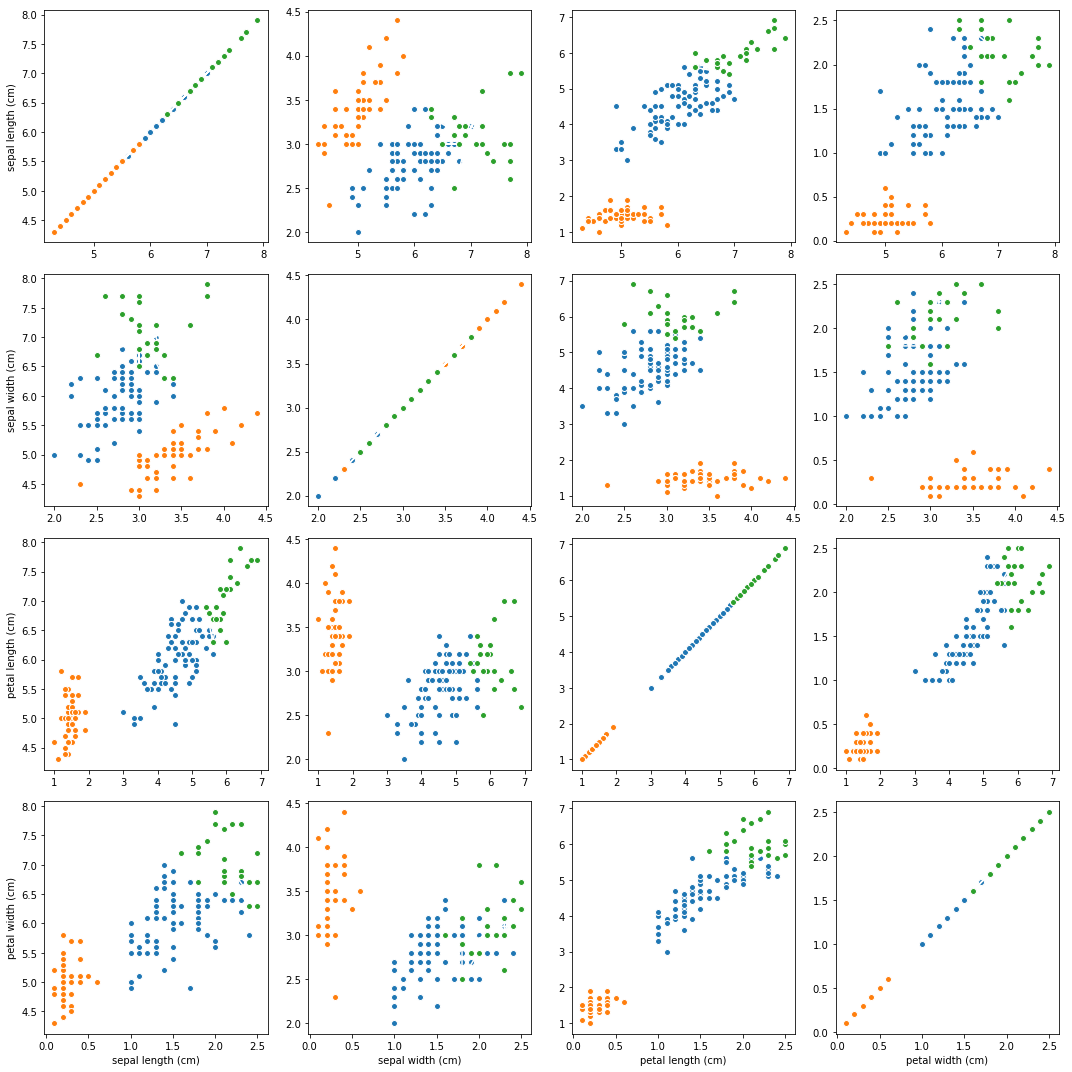

In [12]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plot_iris_clustering(X, birch.labels_)

Silhouette Coefficient 0.485842354576
Dunn Index 0.0402115885332
Davies-Bouldin Index 7.8827183256


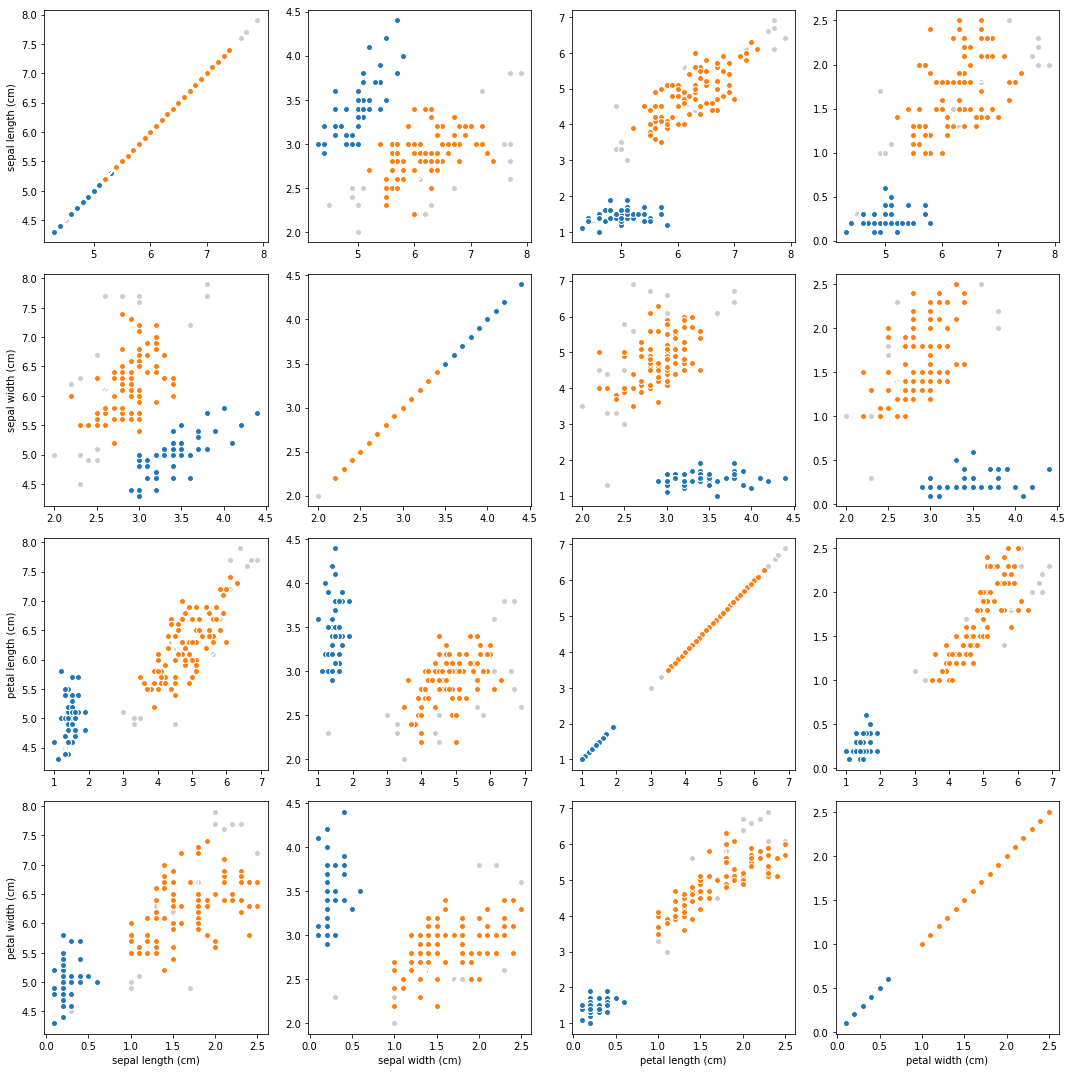

In [13]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plot_iris_clustering(X, dbscan.labels_)

# 1

In [14]:
def plot_birch_clustering(X, birch):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plotClustering(X, birch.labels_, ax=ax)
    
    sub_c = np.vstack(sc.child_.centroids_ for sc in birch.root_.subclusters_)
    ax.plot(sub_c[:, 0], sub_c[:, 1], 'w', markerfacecolor='k', marker='X', markersize=10, linestyle='')
    
    root_c = birch.root_.centroids_
    ax.plot(root_c[:, 0], root_c[:, 1], 'w', markerfacecolor='k', marker='*', markersize=30, linestyle='')

Silhouette Coefficient 0.669980851306
Dunn Index 0.706216661543
Davies-Bouldin Index 0.510285075237


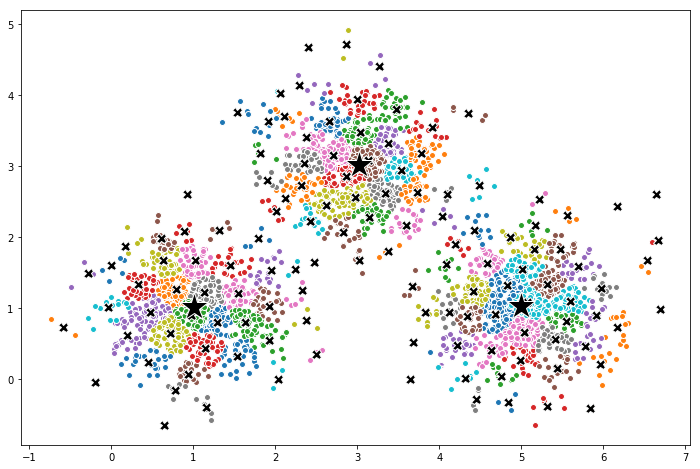

In [29]:
centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

birch = Birch(threshold=0.2, n_clusters=None)
birch.fit(X)

plot_birch_clustering(X, birch)

# 2

In [16]:
centers_ = [[1, 1], [3, 3], [5, 1], [3, 0]]
X1, labels = datasets.make_blobs(n_samples=4000, n_features=2, centers=centers_, cluster_std=0.5)
X1 = np.hstack((X1[:, 0], X1[:, 1] / 5)).reshape(2, -1).T

In [17]:
def normalize(X):
    max_ = np.max(X, axis=0)
    min_ = np.min(X, axis=0)
    return (X - min_) / (max_ - min_)

In [18]:
def standarize(X):
    mean = np.mean(X, axis=0)
    std = np.sqrt(np.sum((X - mean) ** 2, axis=0))
    return (X - mean) / std

In [19]:
def compare(X, alg):
    fix, axes = plt.subplots(1, 3, figsize=(15, 4))

    alg.fit(X)
    plotClustering(X, alg.labels_, ax=axes[0])

    X = normalize(X)
    alg.fit(X)
    print('NORMALIZED')
    plotClustering(X, alg.labels_, ax=axes[1])
    
    X = standarize(X)
    alg.fit(X)
    print('STANDARIZED')
    plotClustering(X, alg.labels_, ax=axes[2])

Silhouette Coefficient 0.500986927727
Dunn Index 0.168603915733
Davies-Bouldin Index 1.08500125801
NORMALIZED
Silhouette Coefficient 0.58367012136
Dunn Index 0.538535719753
Davies-Bouldin Index 0.628778864891
STANDARIZED
Silhouette Coefficient 0.581991707241
Dunn Index 0.530178202433
Davies-Bouldin Index 0.632693922402


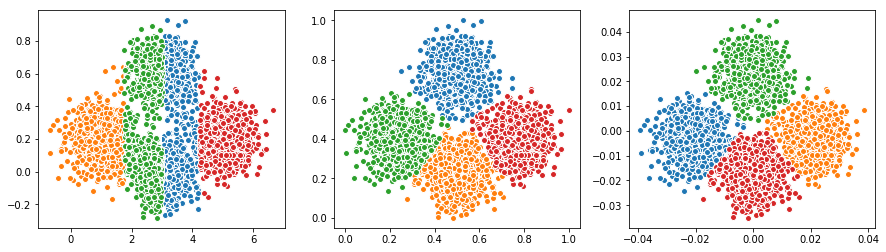

In [20]:
compare(X1, KMeans(init='k-means++', n_clusters=4, n_init=1))

Silhouette Coefficient 0.500986927727
Dunn Index 0.168603915733
Davies-Bouldin Index 1.08500125801
NORMALIZED


/pio/os/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (3) by Birch is less than (4). Decrease the threshold.
  % (len(centroids), self.n_clusters))


Silhouette Coefficient 0.58367012136
Dunn Index 0.538535719753
Davies-Bouldin Index 0.628778864891
STANDARIZED


/pio/os/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (1) by Birch is less than (4). Decrease the threshold.
  % (len(centroids), self.n_clusters))


Silhouette Coefficient 0.581991707241
Dunn Index 0.530178202433
Davies-Bouldin Index 0.632693922402


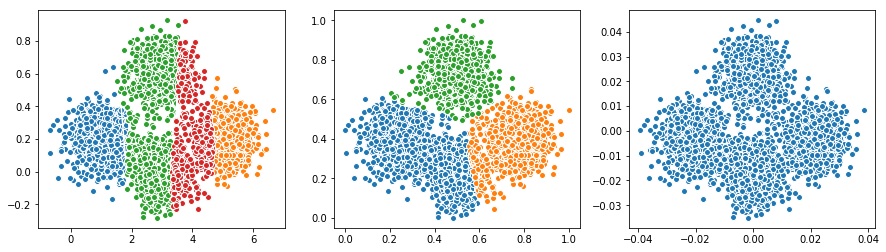

In [21]:
compare(X1, Birch(threshold=0.2, n_clusters=4))

Silhouette Coefficient 0.500986927727
Dunn Index 0.168603915733
Davies-Bouldin Index 1.08500125801
NORMALIZED
Silhouette Coefficient 0.58367012136
Dunn Index 0.538535719753
Davies-Bouldin Index 0.628778864891
STANDARIZED
Silhouette Coefficient 0.581991707241
Dunn Index 0.530178202433
Davies-Bouldin Index 0.632693922402


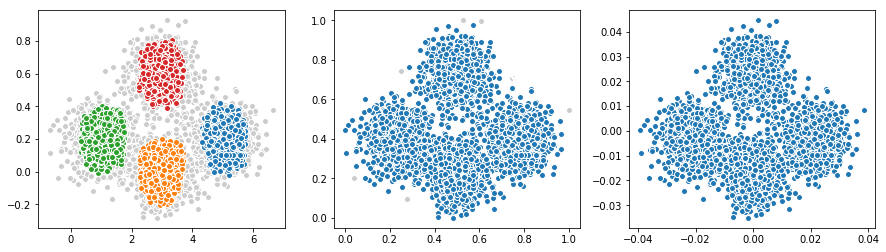

In [22]:
compare(X1, DBSCAN(eps=0.08, min_samples=25))

In [23]:
centers_ = [[1, 0], [3, 0], [5, 0], [7, 0]]
X2, labels = datasets.make_blobs(n_samples=4000, n_features=2, centers=centers_, cluster_std=0.5)

Silhouette Coefficient 0.517767558402
Dunn Index 0.533079390387
Davies-Bouldin Index 0.709401674984
NORMALIZED
Silhouette Coefficient 0.338522033376
Dunn Index 0.217337939358
Davies-Bouldin Index 1.33543395183
STANDARIZED
Silhouette Coefficient 0.200531442263
Dunn Index 0.117297736543
Davies-Bouldin Index 2.34819175255


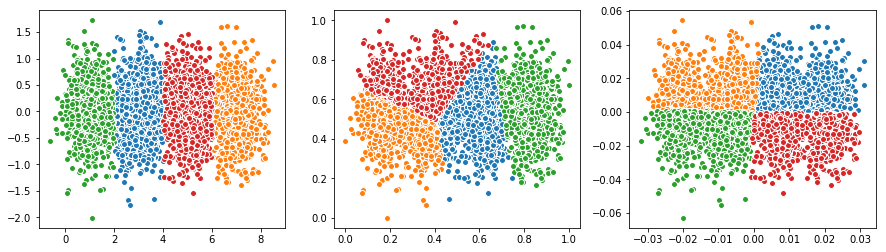

In [24]:
compare(X2, KMeans(init='k-means++', n_clusters=4, n_init=1))